 #%%
# Emsemble Learning Test
use 11 models to predict the test data by voting.

In [1]:
import pandas as pd
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the test data
X_test=pickle.load(open('X_test','rb'))/255.0
y_test=pickle.load(open('y_test','rb'))

In [3]:
def create_model():
    inputl=Input(shape=(128,128,1))

    x=Conv2D(96,(3,3),padding="same")(inputl)
    x=Activation("relu")(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.3)(x)

    x=Conv2D(72,(3,3),padding="same")(x)
    x=Activation("relu")(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.3)(x)

    x1=Conv2D(72,(3,3),padding="same")(x)
    x1=Activation("relu")(x1)
    x1=MaxPooling2D(pool_size=(2,2))(x1)
    x1=Dropout(0.3)(x1)
    x2=Conv2D(32,(5,5),padding="same")(x)
    x2=Activation("relu")(x2)
    x2=MaxPooling2D(pool_size=(2,2))(x2)
    x2=Dropout(.3)(x2)
    x3=Conv2D(32,(7,7),padding="same")(x)
    x3=Activation("relu")(x3)
    x3=MaxPooling2D(pool_size=(2,2))(x3)
    x3=Dropout(0.3)(x3)

    x=concatenate([x1,x2,x3],axis=3)

    x=Flatten()(x)

    x=Dense(84, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.3)(x)
    x=Dense(128, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.5)(x)
    x=Dense(128, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.3)(x)
    outputl=Dense(1,activation="sigmoid")(x)
    model=Model(inputs=inputl,outputs=outputl)
    opt= tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy",tf.keras.metrics.AUC(name='auc'),tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
    return model
model_f=create_model()

In [4]:
predict_result=[]

In [5]:
model_f.load_weights('difker_3020e.h5')
print(model_f.evaluate(X_test,y_test))
predict_result.append(model_f.predict(X_test))

284/284 [==============================] - 7s 9ms/step - loss: 0.2330 - accuracy: 0.9400 - auc: 0.9825 - precision: 0.9506 - recall: 0.9291
[0.2329743653535843, 0.9400463700294495, 0.9825066924095154, 0.9505618214607239, 0.929057776927948]


In [6]:
def create_model():
    inputl=Input(shape=(128,128,1))

    x=Conv2D(96,(3,3),padding="same")(inputl)
    x=Activation("relu")(x)
    x=MaxPooling2D(pool_size=(2,2))(x)

    x=Conv2D(72,(3,3),padding="same")(x)
    x=Activation("relu")(x)
    x=MaxPooling2D(pool_size=(2,2))(x)

    x1=Conv2D(72,(3,3),padding="same")(x)
    x1=Activation("relu")(x1)
    x1=MaxPooling2D(pool_size=(2,2))(x1)

    x2=Conv2D(32,(5,5),padding="same")(x)
    x2=Activation("relu")(x2)
    x2=MaxPooling2D(pool_size=(2,2))(x2)

    x3=Conv2D(32,(7,7),padding="same")(x)
    x3=Activation("relu")(x3)
    x3=MaxPooling2D(pool_size=(2,2))(x3)

    x=concatenate([x1,x2,x3],axis=3)

    x=Flatten()(x)

    x=Dense(84, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.3)(x)
    x=Dense(128, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.5)(x)
    x=Dense(128, activation="relu",kernel_regularizer=regularizers.l2(l=0.001),bias_regularizer=regularizers.l2(l=0.001))(x)
    x=Dropout(0.3)(x)
    outputl=Dense(1,activation="sigmoid")(x)
    model=Model(inputs=inputl,outputs=outputl)
    opt= tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy",tf.keras.metrics.AUC(name='auc'),tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
    return model

In [7]:
for i in range(10):
    model=create_model()
    model.load_weights('model'+str(i)+'.h5')
    predict_result.append(model.predict(X_test))
    print(model.evaluate(X_test,y_test))

284/284 [==============================] - 3s 9ms/step - loss: 0.7490 - accuracy: 0.8374 - auc: 0.9038 - precision: 0.8465 - recall: 0.8263
[0.7490403652191162, 0.8373633623123169, 0.9037599563598633, 0.8465346693992615, 0.8262683749198914]
284/284 [==============================] - 3s 8ms/step - loss: 0.6212 - accuracy: 0.8569 - auc: 0.9216 - precision: 0.8667 - recall: 0.8454
[0.621160089969635, 0.8569062352180481, 0.9215736985206604, 0.8666967153549194, 0.8453766703605652]
284/284 [==============================] - 3s 8ms/step - loss: 0.6855 - accuracy: 0.8467 - auc: 0.9133 - precision: 0.8293 - recall: 0.8752
[0.6855185031890869, 0.8467483520507812, 0.9132983088493347, 0.8293444514274597, 0.875247061252594]
284/284 [==============================] - 3s 8ms/step - loss: 0.6737 - accuracy: 0.8377 - auc: 0.9120 - precision: 0.8230 - recall: 0.8627
[0.6736589074134827, 0.8376945853233337, 0.9119613766670227, 0.8229625225067139, 0.8627278804779053]
284/284 [=============================

In [8]:
predict_result=np.array(predict_result)

In [9]:
predict_result.shape

(11, 9057, 1)

In [10]:
predict_result_df=pd.DataFrame(predict_result.reshape(11,9057))

In [11]:
predict_result_df

,0,1,2,3,4,5,6,7,8,9,...,9047,9048,9049,9050,9051,9052,9053,9054,9055,9056
0,0.006068,0.001199,2.747144e-07,1.000000,6.518153e-09,0.997982,3.163080e-08,0.000014,0.000988,0.999657,...,0.002981,0.106388,5.431856e-09,0.999998,2.918073e-06,0.000889,1.583856e-10,0.999986,0.000003,0.999921
1,0.999990,0.001102,1.473525e-03,0.999943,1.245846e-05,0.020802,1.360413e-04,0.001837,0.003620,0.999868,...,0.970967,0.002050,6.975064e-04,0.000997,4.852330e-04,0.045073,6.145109e-05,0.999966,0.000099,0.897809
2,0.870419,0.005791,2.471173e-03,0.992300,3.530477e-05,0.469511,2.382287e-04,0.000840,0.001506,0.999912,...,0.007894,0.001342,2.716532e-04,0.000319,8.993652e-05,0.129429,2.317258e-05,0.999654,0.000063,0.013914
3,0.994005,0.003403,4.074389e-04,0.999842,5.840516e-05,0.931852,3.227591e-04,0.002704,0.000934,0.956485,...,0.069579,0.001429,1.047976e-04,0.904762,7.135489e-05,0.294304,2.832599e-05,0.998537,0.000833,0.752400
4,0.999233,0.001694,2.593511e-02,0.999846,1.150104e-05,0.701886,6.789335e-04,0.000278,0.007438,0.983310,...,0.009971,0.000021,4.358719e-04,0.011347,5.485135e-06,0.141682,1.107404e-04,0.997713,0.000953,0.521762
5,0.080430,0.001508,2.962855e-05,0.313067,1.814894e-08,0.057423,5.057469e-05,0.000120,0.000132,0.944232,...,0.226689,0.000038,9.323050e-07,0.007028,3.278530e-07,0.000262,6.324959e-06,0.999215,0.000042,0.001907
6,0.999822,0.000349,1.344285e-04,0.994324,9.561417e-08,0.995188,1.673651e-05,0.547227,0.000352,0.647653,...,0.025174,0.002029,1.322175e-04,0.593933,8.851638e-05,0.321477,2.504557e-05,0.998935,0.000254,0.837202
7,0.999010,0.000809,3.915717e-04,0.999680,1.216471e-07,0.992757,3.266530e-05,0.031342,0.000050,0.153465,...,0.427521,0.001038,9.162216e-06,0.000691,9.959014e-05,0.003598,1.840434e-04,0.999883,0.000123,0.096237
8,0.980618,0.000297,4.801703e-05,0.019752,1.769724e-06,0.861952,6.504172e-07,0.000206,0.000009,0.278423,...,0.174875,0.000368,7.409092e-07,0.000499,3.082943e-06,0.000148,1.541773e-04,0.997582,0.000392,0.019744
9,0.995066,0.074554,1.061987e-04,0.956066,1.996553e-03,0.056437,1.042583e-05,0.001148,0.002898,0.013340,...,0.862715,0.000761,6.123006e-06,0.995874,3.283292e-07,0.001147,1.452835e-04,0.271348,0.000035,0.395163


In [12]:
#weight vote,first model has higher weight
def vote(weight0):
    predict_result1=weight0*predict_result[0]
    for i in range(1,11):
        predict_result1+=predict_result[i]
    predict_result1=predict_result1/(10+weight0)
    predict_result1=np.where(predict_result1>=0.5,1,0)
    cm=confusion_matrix(y_test,predict_result1)
    f=plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt="d")
    print("Accuracy:",(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))
    print("Recall:",cm[1,1]/(cm[1,0]+cm[1,1]))
    print("Precision:",cm[1,1]/(cm[0,1]+cm[1,1]))
    return predict_result1

Accuracy: 0.8848404548967649
Recall: 0.8730507357786075
Precision: 0.8952702702702703


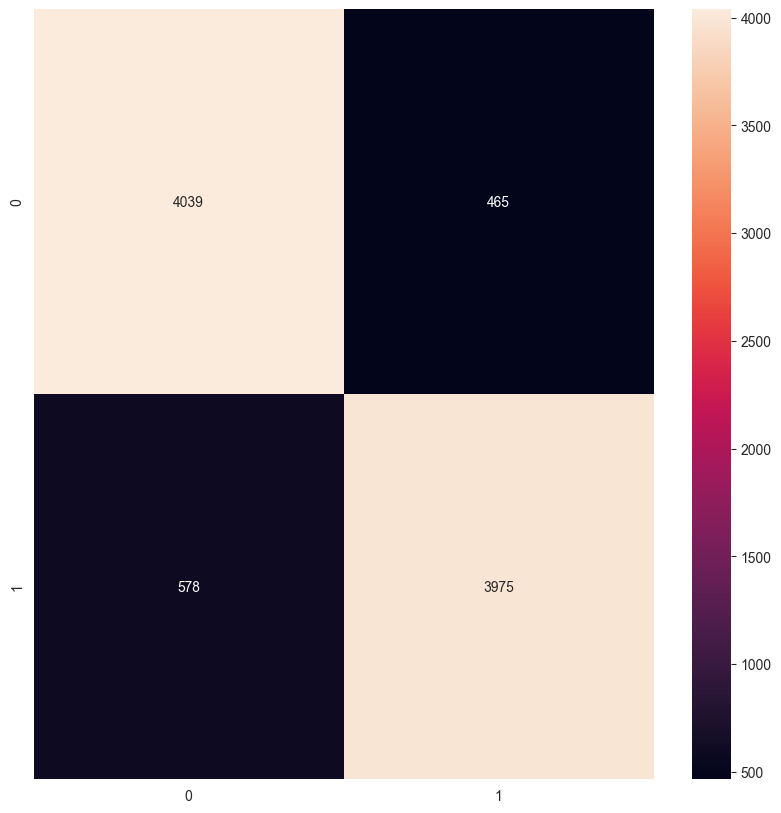

In [14]:
w0=vote(0)

Accuracy: 0.886165396930551
Recall: 0.8743685482099715
Precision: 0.8966216216216216


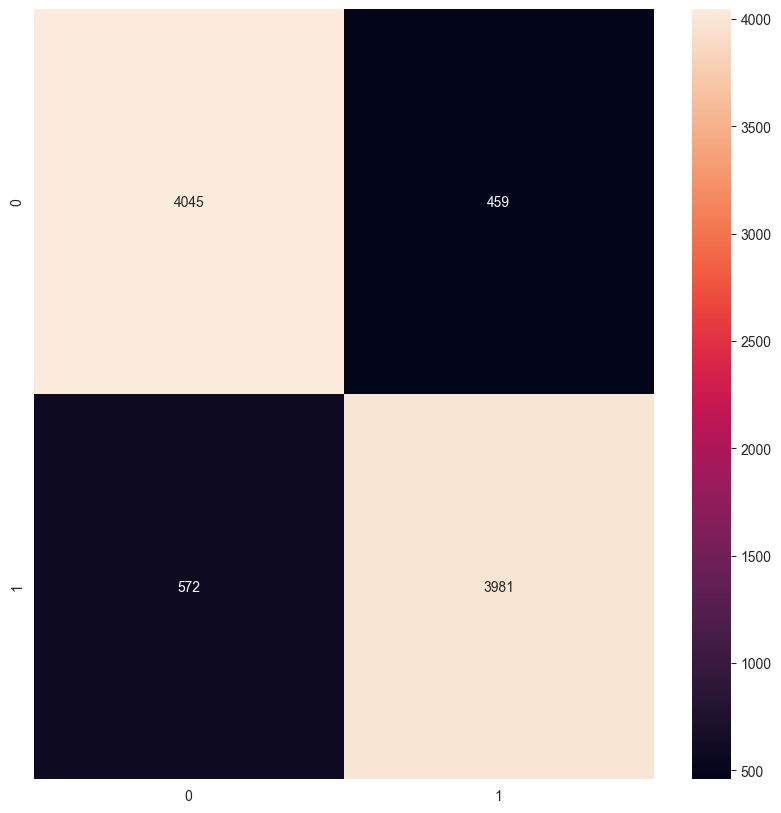

In [15]:
w01=vote(0.1)

Accuracy: 0.8903610467042067
Recall: 0.8787612563145178
Precision: 0.9007203962179199


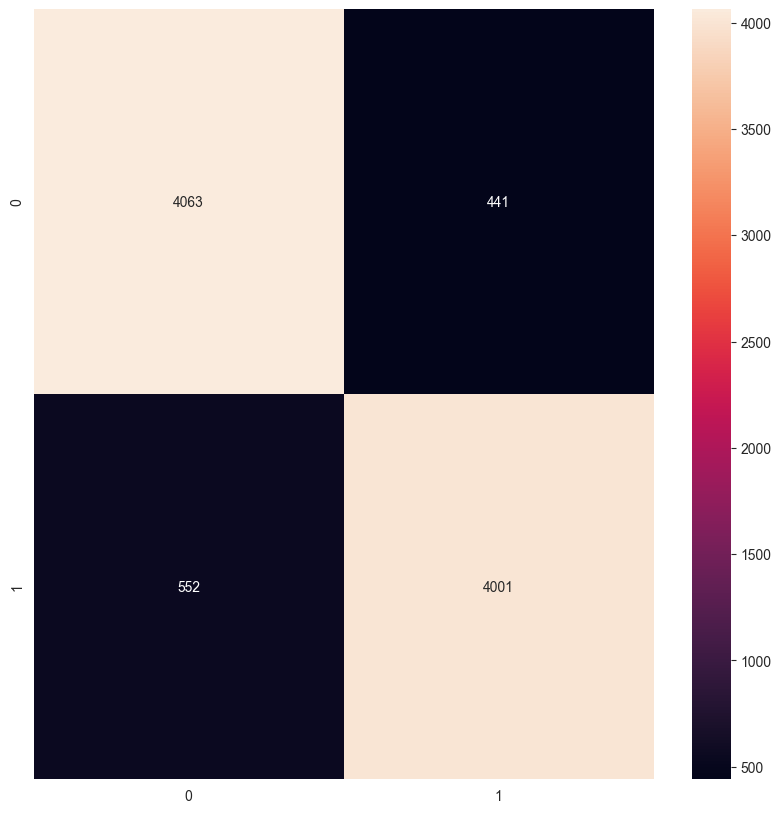

In [16]:
w02=vote(0.5)

Accuracy: 0.8943358728055647
Recall: 0.883593235229519
Precision: 0.9040449438202247


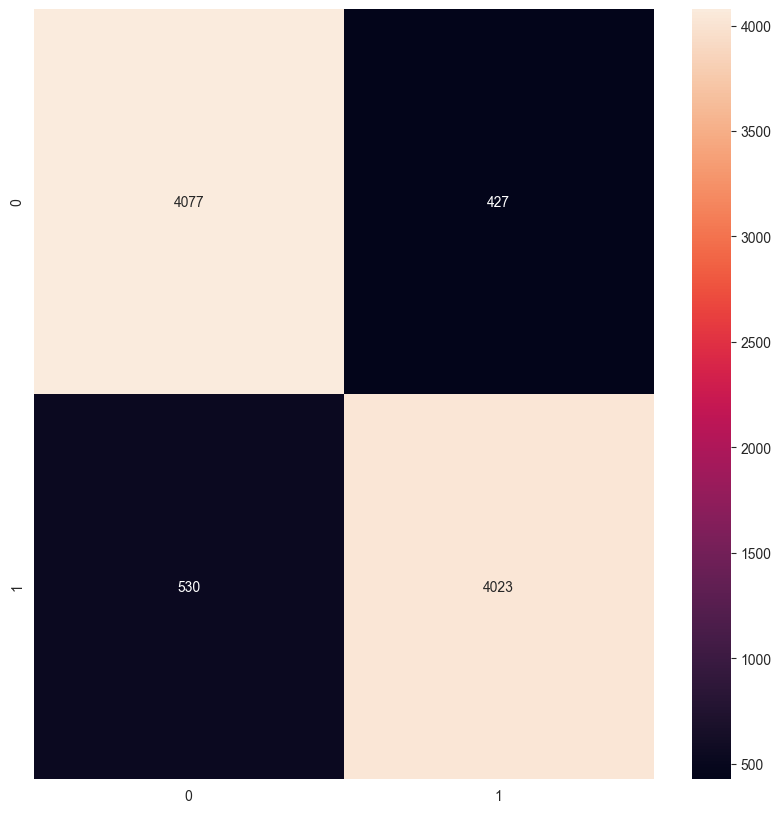

In [13]:
w1=vote(1)

Accuracy: 0.903500055205918
Recall: 0.8934768284647485
Precision: 0.9127215615885125


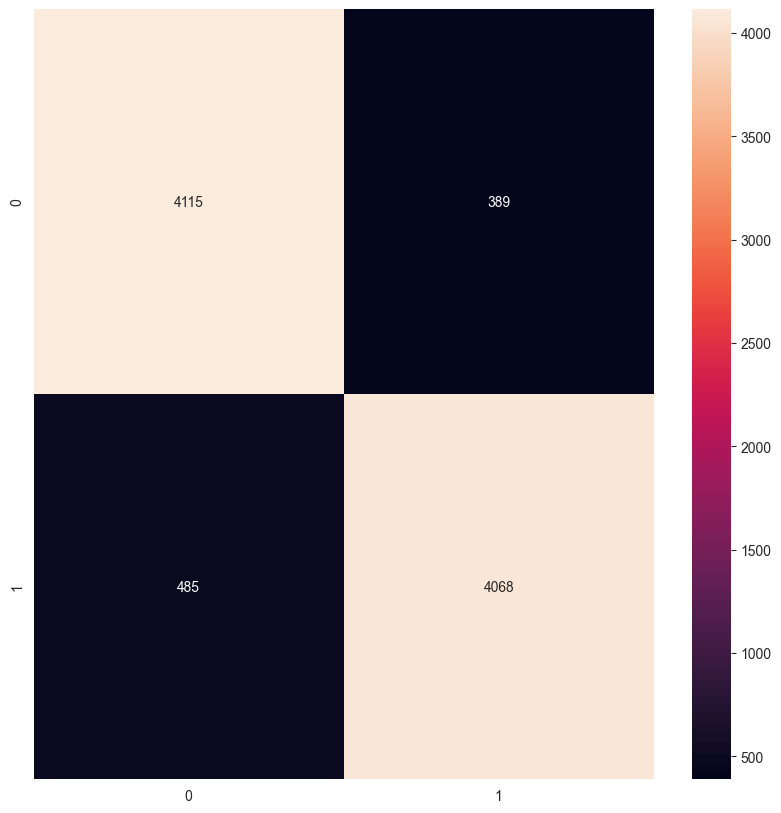

In [16]:
w2=vote(2)

Accuracy: 0.909572706194104
Recall: 0.9005051614320229
Precision: 0.9180474697716077


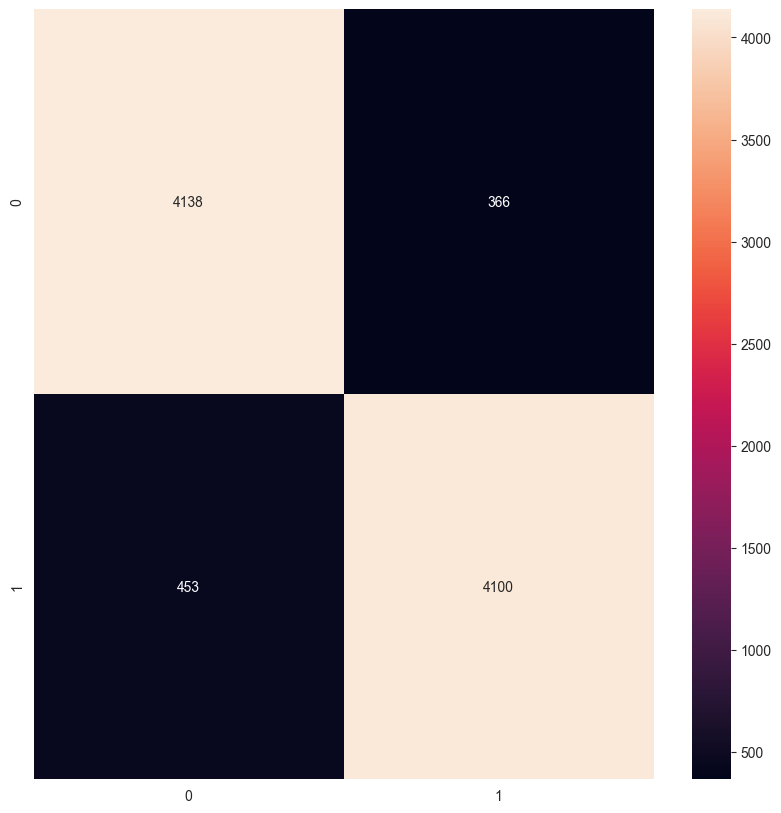

In [17]:
w3=vote(3)

Accuracy: 0.9155349453461411
Recall: 0.905337140347024
Precision: 0.9250448833034112


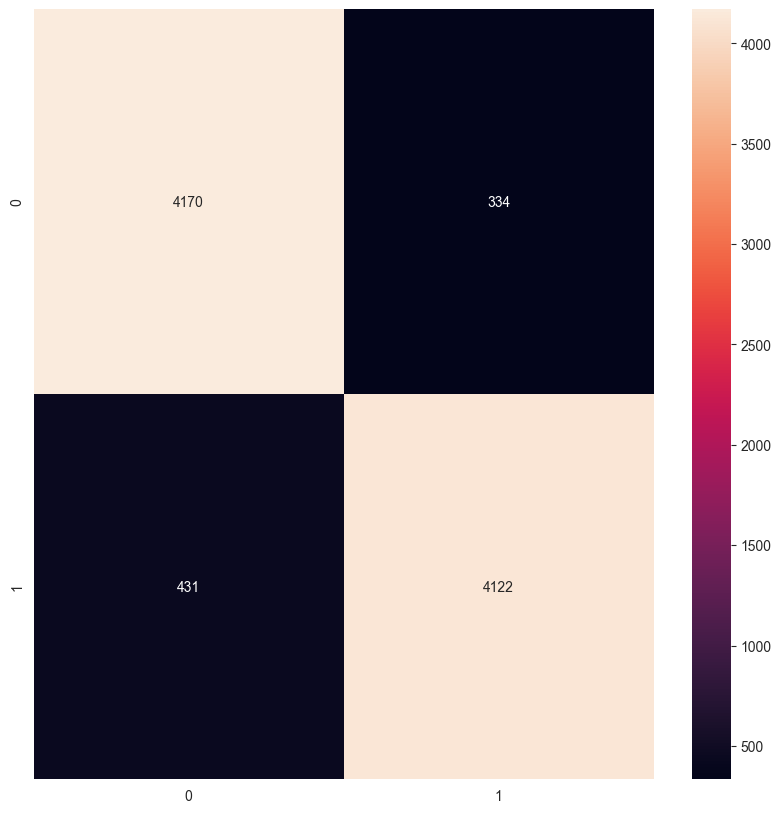

In [18]:
w4=vote(4)

Accuracy: 0.9200618306282433
Recall: 0.9099494838567977
Precision: 0.9295490240071798


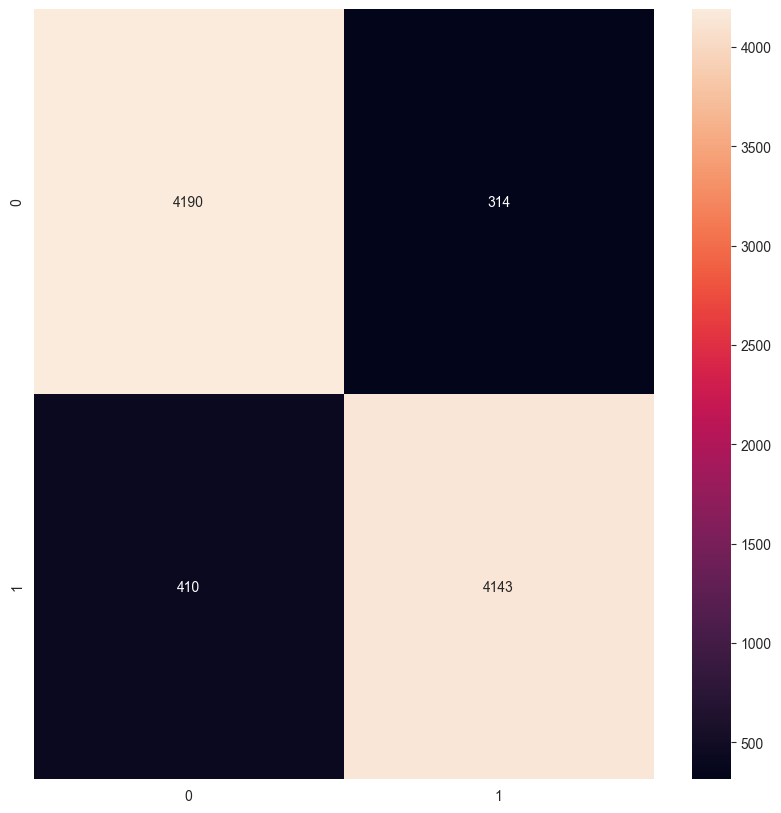

In [19]:
w5=vote(5)

Accuracy: 0.9248095395826432
Recall: 0.9143421919613441
Precision: 0.9346654692411316


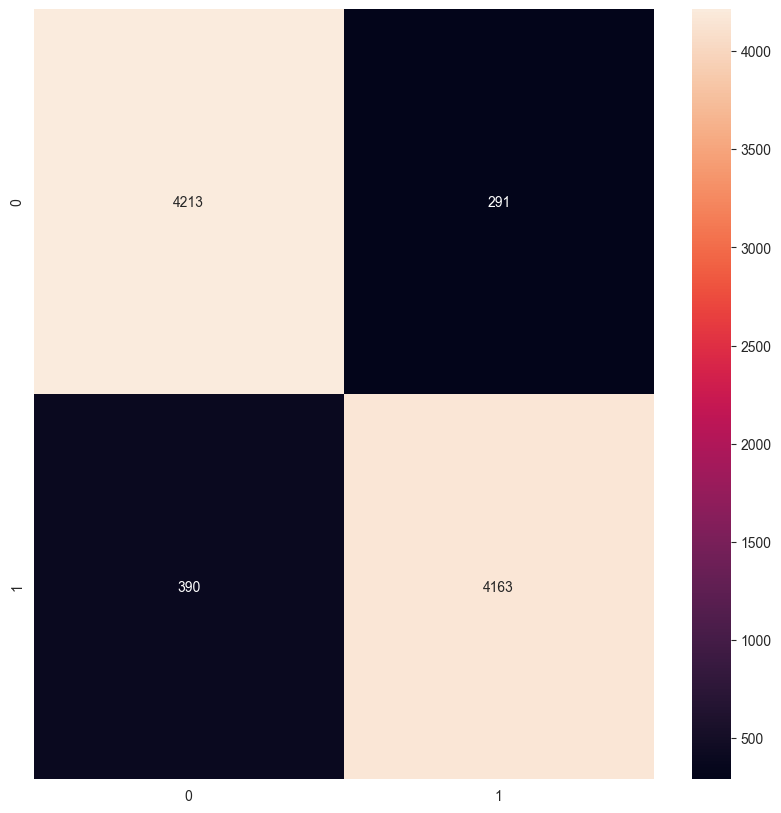

In [20]:
w6=vote(6)

Accuracy: 0.9277906591586618
Recall: 0.917636723039754
Precision: 0.9374018398025578


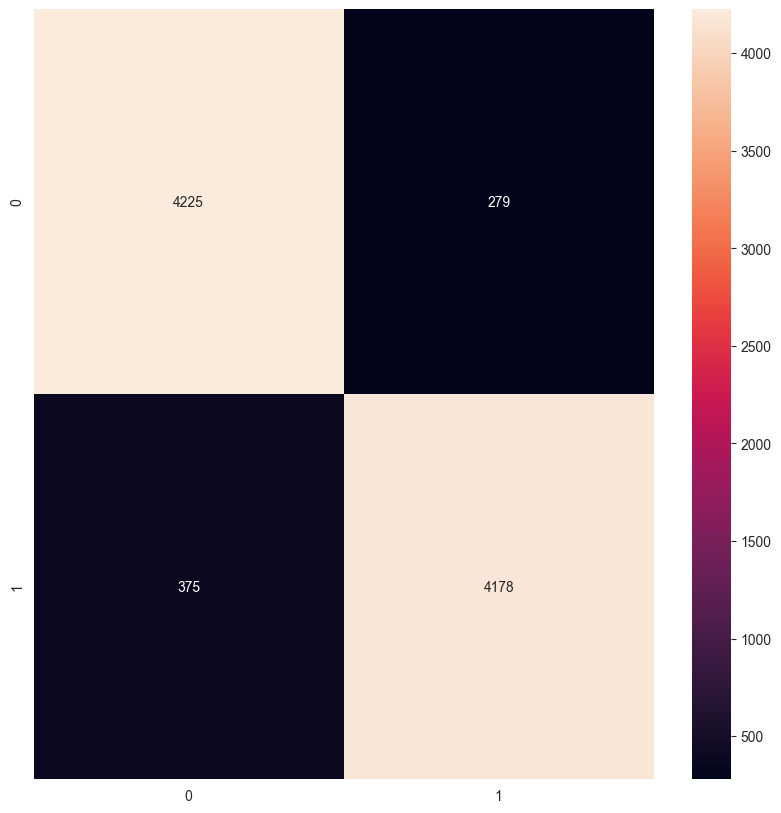

In [21]:
w7=vote(7)

Accuracy: 0.9312134260792757
Recall: 0.9211508895233912
Precision: 0.9407806191117093


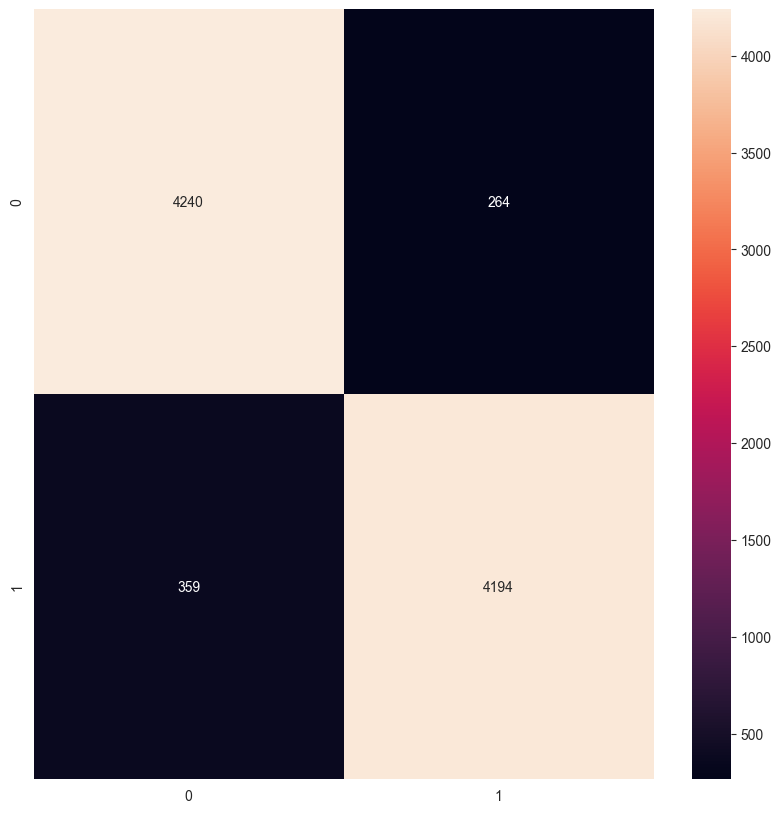

In [22]:
w8=vote(8)

Accuracy: 0.9336424864745501
Recall: 0.9235668789808917
Precision: 0.9432480933153881


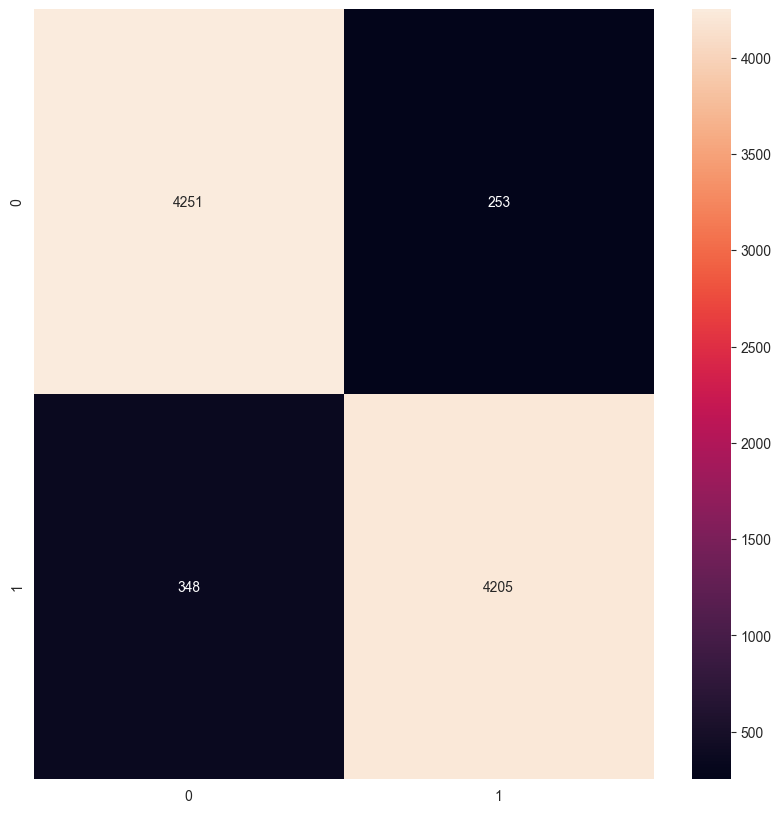

In [23]:
w9=vote(9)

Accuracy: 0.9362923705421221
Recall: 0.9273006808697563
Precision: 0.9449418084153984


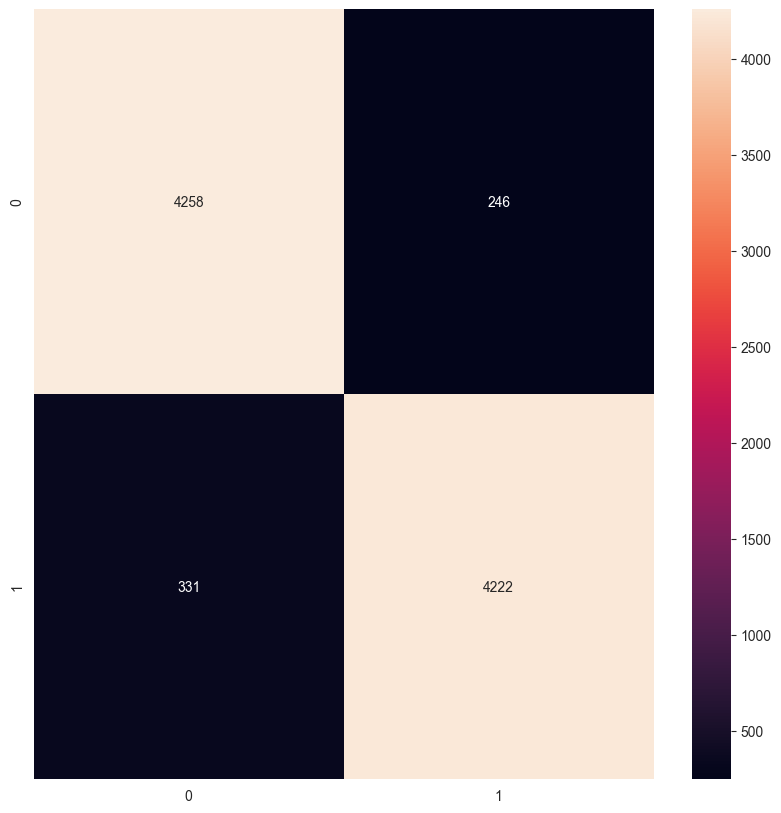

In [24]:
w10=vote(10)

Accuracy: 0.9372860770674616
Recall: 0.9279595870854381
Precision: 0.9462486002239642


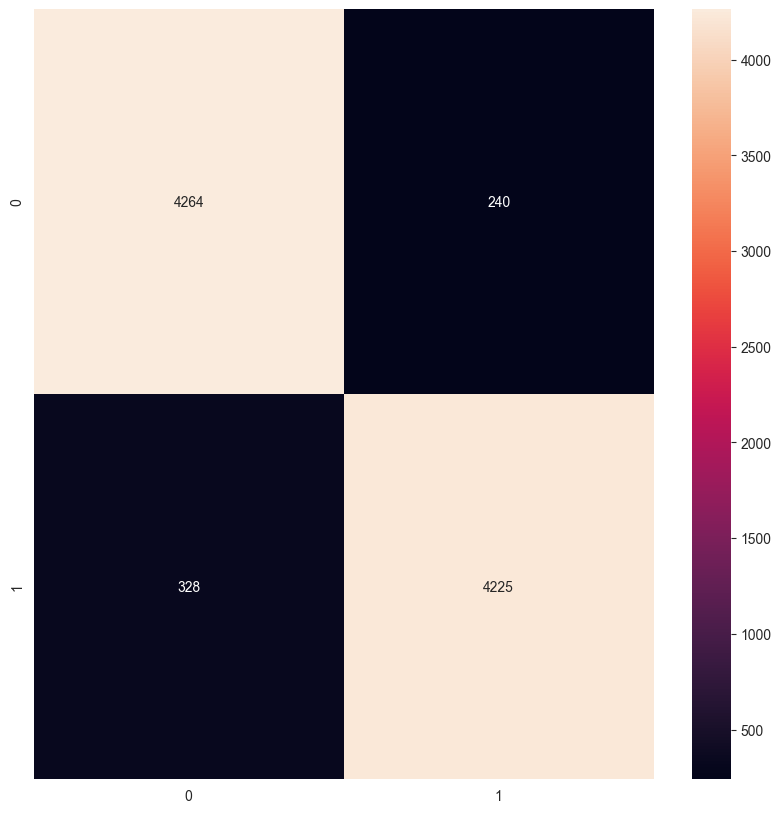

In [25]:
w11=vote(11)

Accuracy: 0.937065253395164
Recall: 0.9279595870854381
Precision: 0.9458249384374301


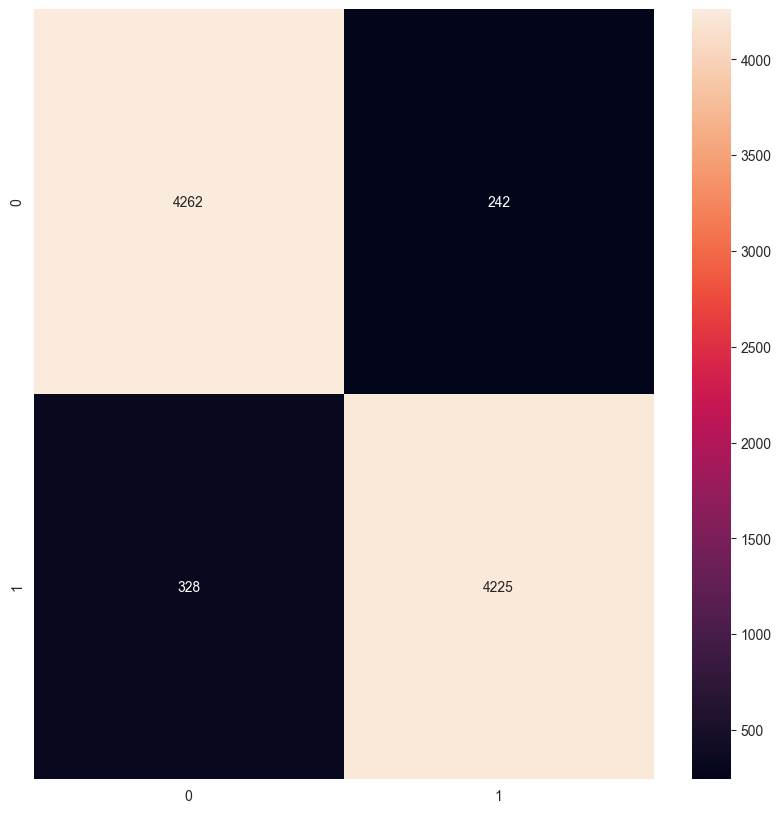

In [26]:
w12=vote(12)

Accuracy: 0.937727724412057
Recall: 0.9281792224906655
Precision: 0.9468967062514004


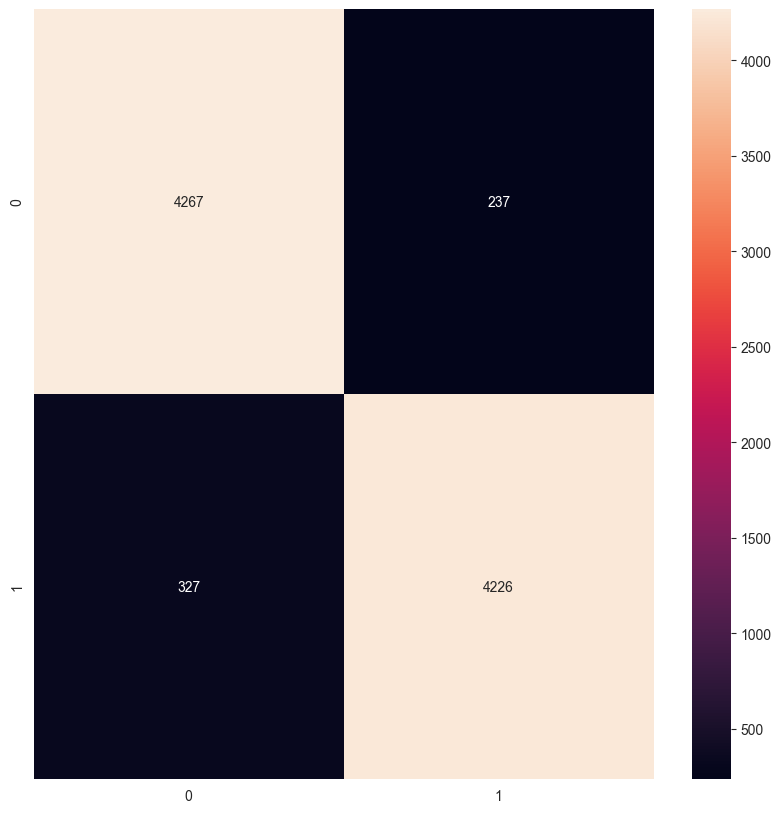

In [27]:
w13=vote(13)

Accuracy: 0.9379485480843547
Recall: 0.9283988578958928
Precision: 0.9471207707819852


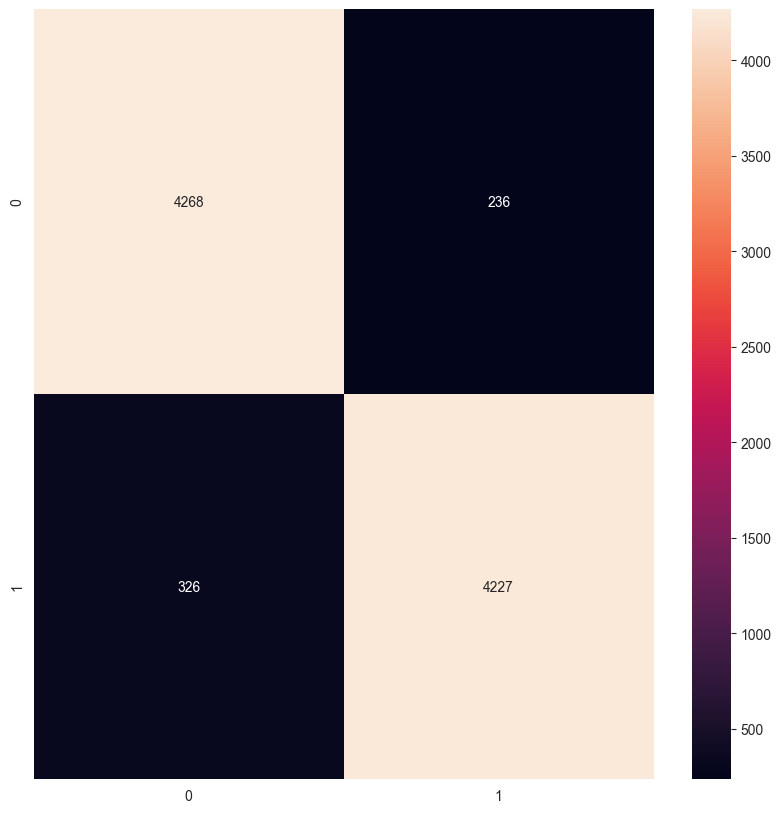

In [28]:
w14=vote(14)

Accuracy: 0.9389422546096942
Recall: 0.9275203162749835
Precision: 0.949842555105713


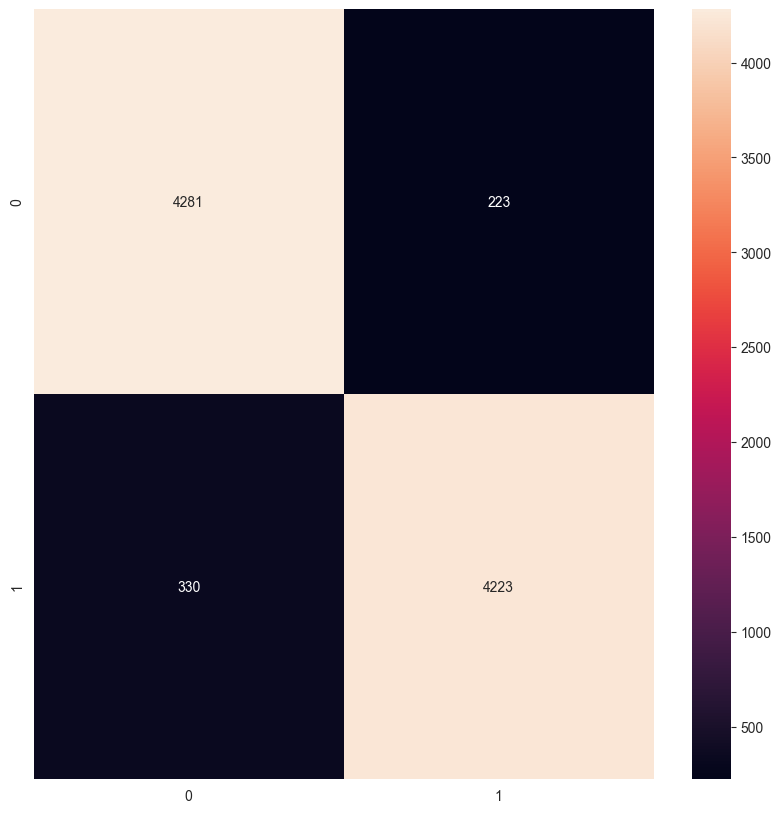

In [29]:
w100=vote(100)

All of those model are not greater than the first model,maybe ensemble can not perform better than single model in this dataset.
But it is still better than the other 10 models.